# **Histogram**

Her bir piksel 0-255 arasında değer alır.

Bir görüntüde örneğin 240 piksel değerinden, 1 piksel değerinden ne kadar olduğu kısacası hangi piksel değerinden kaç tane bulunduğu hakkındaki bilgi görüntü histogramı ile alınabilir.

Histograma bakılarak görüntünün ton dağılımı anlaşılabilir.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#read image
img = cv2.imread(r"C:\Users\ilhan\Desktop\red_blue.jpg")

In [ ]:
#converting image bgr to rgb formar
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

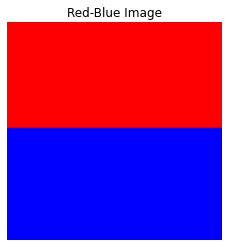

In [ ]:
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.title("Red-Blue Image")
plt.show()

In [ ]:
img_hist = cv2.calcHist([img], channels = [0], mask = None, histSize = [256], ranges = [0,256])
#mask parametresi ile maskeleme işlemi yapılır.
#bu yöntem ile görselin belli bir kısmı alınır.

In [ ]:
print(img_hist.shape)

(256, 1)


Grayscale formatında tek bir channel kullanılmıştır.

0-255 arasında toplam 256 piksel vardır.

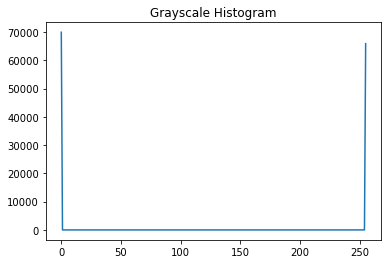

In [ ]:
plt.figure()
plt.plot(img_hist)
plt.title("Grayscale Histogram")
plt.show()

In [ ]:
color = ("b", "g", "r")

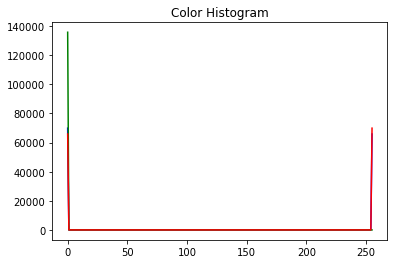

In [ ]:
plt.figure()
for i,c in enumerate(color):
    hist = cv2.calcHist([img], channels = [i], mask = None, histSize = [256], ranges = [0,256])
    plt.plot(hist, color = c)
    plt.title("Color Histogram")

In [ ]:
print("Image Shape",img.shape)

Image Shape (371, 366, 3)


In [ ]:
print("Total Pixel Value: ",371*366)

Total Pixel Value:  135786


135786 piksel yeşildir ve bu pikseller 0 değerindedir.

Çünkü görselde mavi ve kırmızı bölümde, yeşil genliği bulunmamaktadır.

Mavi ve kırmızı ise bu değerin yaklaşık olarak yarısıdır.

Çünkü kırmızı kısımda mavi, mavi kısımda da kırmızı bulunmamaktadır.

Bu yüzden kırmızı bölümde mavi genliği ve mavi bölümde kırmızı genliği 0'dır.

Mavi kısımda bulunan mavi ve kırmızı kısımda bulunan kırmızı genliği yaklaşık 70000 civarındadır ve 255 ile ifade edilmiştir.

Bu örnekten sonra Golden State Köprüsü görselinin genliklerinin dağılımına bakılacaktır.

Burada maskeleme işlemi kullanılıp görselin küçük bir bölümüne odaklanılacaktır.

In [ ]:
#read image
golden_gate = cv2.imread(r"C:\Users\ilhan\Desktop\goldenGate.jpg")

In [ ]:
#converting image bgr to rgb formar
golden_gate = cv2.cvtColor(golden_gate, cv2.COLOR_BGR2RGB)

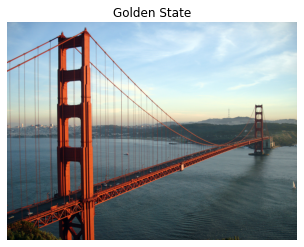

In [ ]:
plt.figure()
plt.imshow(golden_gate)
plt.axis("off")
plt.title("Golden State")
plt.show()

In [ ]:
print("Image Shape",golden_gate.shape)

Image Shape (2448, 3264, 3)


In [ ]:
print("Total Pixel Value: ",2448*3264*3)

Total Pixel Value:  23970816


Oldukça büyük bir görüntü olduğu görülmektedir.

In [ ]:
mask = np.zeros(golden_gate.shape[:2], np.uint8)

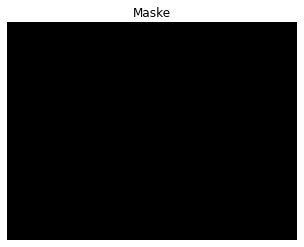

In [ ]:
plt.figure()
plt.imshow(mask, cmap = "gray")
plt.axis("off")
plt.title("Maske")
plt.show()

1'lerden oluştuğu için siyah görünümdedir.

Bu maske görselin tamamına uygulanırsa hiçbir şey gözükmez.

Bu nedenle maske üzerinde bir delik açılacaktır.

Görselin maskedeki deliğinin denk geldiği kısmın dışında kalan alan maskelenmiş olacaktır.

In [ ]:
mask[1500:2000, 1000:2000] = 255

Maskede bu aralıktaki pikseller 255 değerindedir, beyazdır.

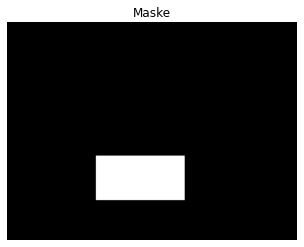

In [ ]:
plt.figure()
plt.imshow(mask, cmap = "gray")
plt.axis("off")
plt.title("Maske")
plt.show()

In [ ]:
masked_img = cv2.bitwise_and(golden_gate, golden_gate, mask = mask)

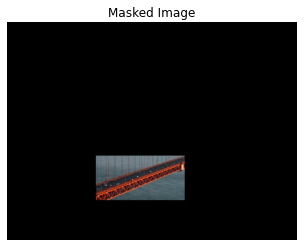

In [ ]:
plt.figure()
plt.imshow(masked_img, cmap = "gray")
plt.axis("off")
plt.title("Masked Image")
plt.show()

Bu yöntem ile orijinal görselin istenmeyen kısımları atılıp, sadece istenilen kısım ile işlem yapılır.

In [ ]:
masked_img_hist_red = cv2.calcHist([golden_gate], channels = [0], mask = mask, histSize = [256], ranges = [0,256])
masked_img_hist_green = cv2.calcHist([golden_gate], channels = [1], mask = mask, histSize = [256], ranges = [0,256])
masked_img_hist_blue = cv2.calcHist([golden_gate], channels = [2], mask = mask, histSize = [256], ranges = [0,256])

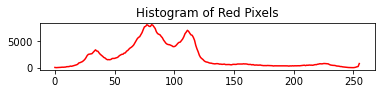

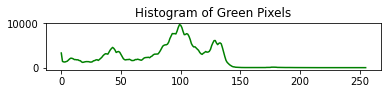

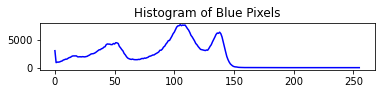

In [ ]:
plt.figure()
plt.subplot(4, 1, 1)
plt.plot(masked_img_hist_red, color='r')
plt.title("Histogram of Red Pixels")
plt.show()

plt.subplot(4, 1, 2)
plt.plot(masked_img_hist_green, color='g')
plt.title("Histogram of Green Pixels")
plt.show()

plt.subplot(4, 1, 3)
plt.plot(masked_img_hist_blue, color='b')
plt.title("Histogram of Blue Pixels")
plt.show()

Channel 0 seçildiğinden kırmızı renkli pikselin genlik dağılımı,

Channel 1 seçildiğinden yeşil renkli pikselin genlik dağılımı,

Channel 2 seçildiğinden mavi renkli pikselin genlik dağılımı subplot kullanılarak histogramlar ile çizdirilmiştir.

Maskeleme işleminden sonra Histogram eşitleme yöntemi kullanılacaktır.

Bu yöntem görseldeki kontrastı (karşıtlık) arttırmayı sağlar.

Kontrast artılırdığında görüntünün detayları ortaya çıkarılarak anlaşılabilirliği artırılabilir.

In [ ]:
img1 = cv2.imread(r"C:\Users\ilhan\Desktop\hist_equ.jpg", 0)

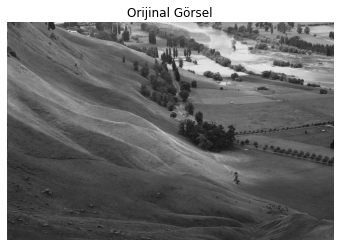

In [ ]:
plt.figure()
plt.imshow(img1, cmap = "gray")
plt.axis("off")
plt.title("Orijinal Görsel")
plt.show()

In [ ]:
img1_hist = cv2.calcHist([img1], channels = [0], mask = None, histSize = [256], ranges = [0,256])

Görüntüde grayscale olduğundan tek bir channel bulunmaktadır.

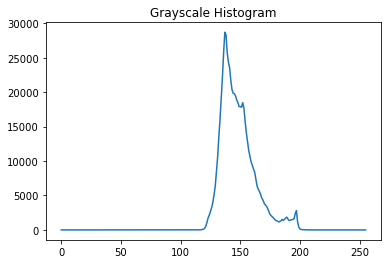

In [ ]:
plt.figure()
plt.plot(img1_hist)
plt.title("Grayscale Histogram")
plt.show()

In [ ]:
#histogram equalization
eq_hist = cv2.equalizeHist(img1)

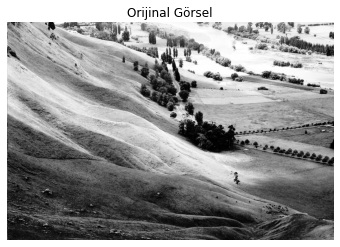

In [ ]:
plt.figure()
plt.imshow(eq_hist, cmap = "gray")
plt.axis("off")
plt.title("Orijinal Görsel")
plt.show()

Histogram eşitleme yöntemiyle görüntünün kontrastı artırılmıştır.

Koyu renkler 0'a açık renkler 255'e yaklaştırılmıştır, böylelikle renklerin arası açılmıştır.

Renklerin arası kontrast artırılarak 0-255 range'ini daha iyi kullanmak hedeflenir, böylece görüntünün daha iyi ortaya çıkması sağlanır.

In [ ]:
eq_img1_hist = cv2.calcHist([eq_hist], channels = [0], mask = None, histSize = [256], ranges = [0,256])

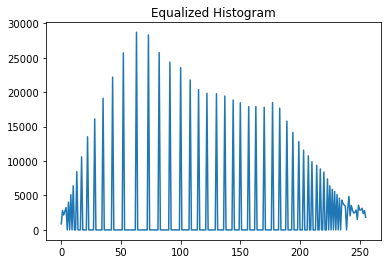

In [ ]:
plt.figure()
plt.plot(eq_img1_hist)
plt.title("Equalized Histogram")
plt.show()

Kontrast artırılarak orijinal görseldeki 120-200 arasındaki dar bölge 0-255 arasına genişletilmiştir.

Böylelikle görüntünün daha anlaşılır olması sağlanmıştır.